In [29]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [30]:
data = pd.read_csv('edited.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

   Unnamed: 0         time_stamps  previous_closeprice  current_price  \
0           0  Jun 6, 12:09PM EDT               153.93         154.33   
1           0  Jun 6, 12:11PM EDT               153.93         154.30   
2           0  Jun 6, 12:13PM EDT               153.93         154.36   
3           1  Jun 6, 12:14PM EDT               153.93         154.35   
4           2  Jun 6, 12:15PM EDT               153.93         154.37   

   variation  magnitude_change  
0       0.40              0.26  
1       0.37              0.24  
2       0.43              0.28  
3       0.42              0.27  
4       0.44              0.29  

 Data Types:
Unnamed: 0               int64
time_stamps             object
previous_closeprice    float64
current_price          float64
variation              float64
magnitude_change       float64
dtype: object


In [31]:
dateparse = lambda dates: dates.split(" ")[2]
data = pd.read_csv('edited.csv', parse_dates=True, index_col='time_stamps',date_parser=dateparse)
print data.head()

                     Unnamed: 0  previous_closeprice  current_price  \
time_stamps                                                           
2017-06-07 12:09:00           0               153.93         154.33   
2017-06-07 12:11:00           0               153.93         154.30   
2017-06-07 12:13:00           0               153.93         154.36   
2017-06-07 12:14:00           1               153.93         154.35   
2017-06-07 12:15:00           2               153.93         154.37   

                     variation  magnitude_change  
time_stamps                                       
2017-06-07 12:09:00       0.40              0.26  
2017-06-07 12:11:00       0.37              0.24  
2017-06-07 12:13:00       0.43              0.28  
2017-06-07 12:14:00       0.42              0.27  
2017-06-07 12:15:00       0.44              0.29  


In [32]:
data.index

DatetimeIndex(['2017-06-07 12:09:00', '2017-06-07 12:11:00',
               '2017-06-07 12:13:00', '2017-06-07 12:14:00',
               '2017-06-07 12:15:00', '2017-06-07 12:16:00',
               '2017-06-07 12:17:00', '2017-06-07 12:18:00',
               '2017-06-07 12:19:00', '2017-06-07 12:20:00',
               ...
               '2017-06-07 15:51:00', '2017-06-07 15:52:00',
               '2017-06-07 15:53:00', '2017-06-07 15:54:00',
               '2017-06-07 15:55:00', '2017-06-07 15:56:00',
               '2017-06-07 15:57:00', '2017-06-07 15:58:00',
               '2017-06-07 15:59:00', '2017-06-07 16:00:00'],
              dtype='datetime64[ns]', name=u'time_stamps', length=169, freq=None)

In [33]:
ts = data['current_price'] 
ts.head(10)

time_stamps
2017-06-07 12:09:00    154.33
2017-06-07 12:11:00    154.30
2017-06-07 12:13:00    154.36
2017-06-07 12:14:00    154.35
2017-06-07 12:15:00    154.37
2017-06-07 12:16:00    154.36
2017-06-07 12:17:00    154.34
2017-06-07 12:18:00    154.32
2017-06-07 12:19:00    154.32
2017-06-07 12:20:00    154.30
Name: current_price, dtype: float64

In [34]:
ts['2017-06-06 12:09:00':'2017-06-06 12:16:00']

Series([], Name: current_price, dtype: float64)

In [35]:
len(ts)

169

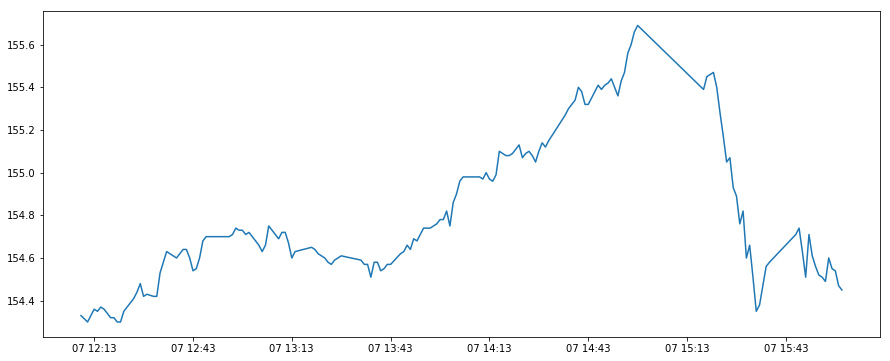

In [36]:
plt.plot(ts)

In [37]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


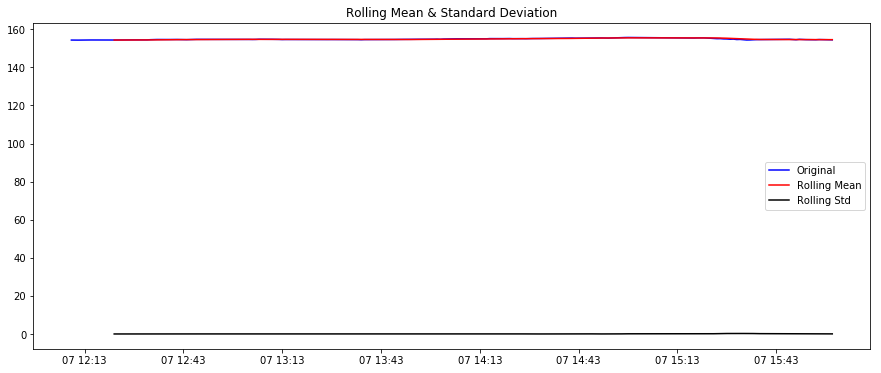

Results of Dickey-Fuller Test:
Test Statistic                  -1.343150
p-value                          0.609207
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (5%)             -2.878903
Critical Value (1%)             -3.469886
Critical Value (10%)            -2.576027
dtype: float64


In [38]:
test_stationarity(ts)

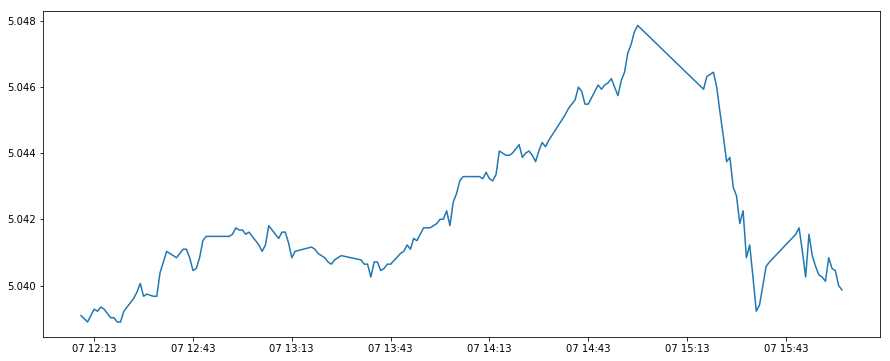

In [39]:
ts_log = np.log(ts)
plt.plot(ts_log)

/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


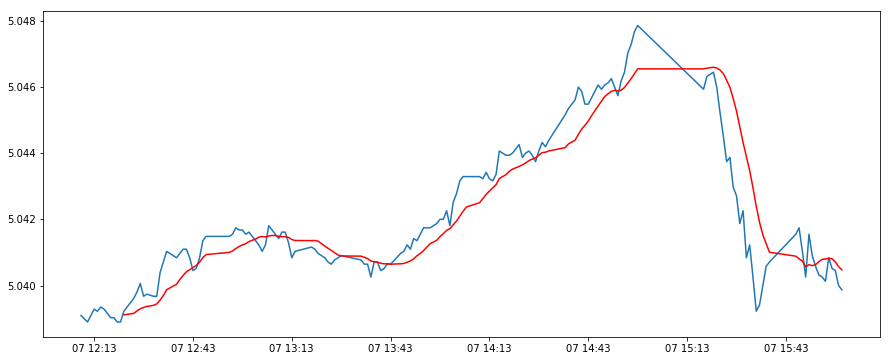

In [40]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [41]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

time_stamps
2017-06-07 12:09:00         NaN
2017-06-07 12:11:00         NaN
2017-06-07 12:13:00         NaN
2017-06-07 12:14:00         NaN
2017-06-07 12:15:00         NaN
2017-06-07 12:16:00         NaN
2017-06-07 12:17:00         NaN
2017-06-07 12:18:00         NaN
2017-06-07 12:19:00         NaN
2017-06-07 12:20:00         NaN
2017-06-07 12:21:00         NaN
2017-06-07 12:22:00    0.000108
Name: current_price, dtype: float64

/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


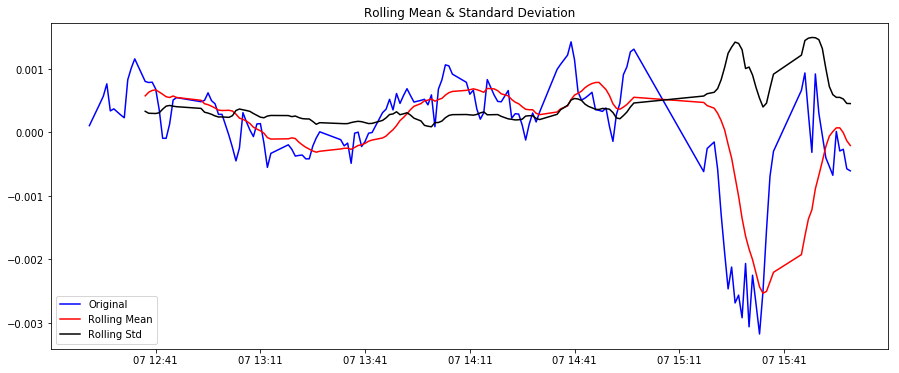

Results of Dickey-Fuller Test:
Test Statistic                  -2.611633
p-value                          0.090617
#Lags Used                       0.000000
Number of Observations Used    157.000000
Critical Value (5%)             -2.880132
Critical Value (1%)             -3.472703
Critical Value (10%)            -2.576683
dtype: float64


In [42]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


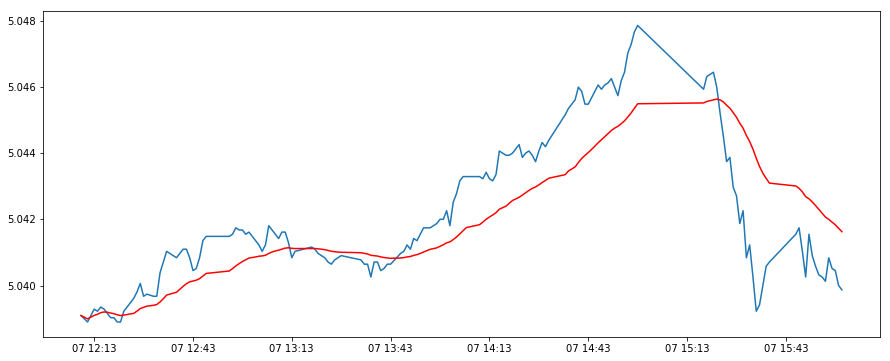

In [43]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


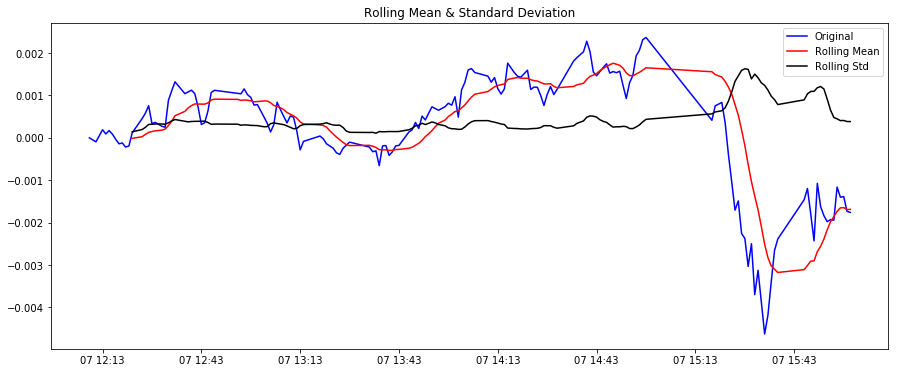

Results of Dickey-Fuller Test:
Test Statistic                  -1.474117
p-value                          0.546274
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (5%)             -2.878903
Critical Value (1%)             -3.469886
Critical Value (10%)            -2.576027
dtype: float64


In [44]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

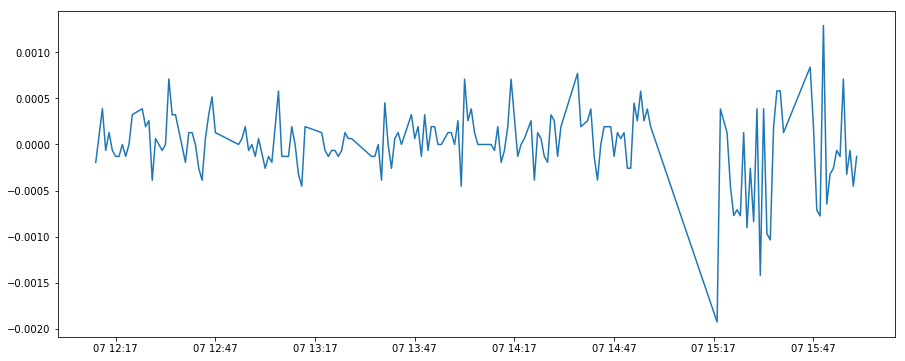

In [45]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


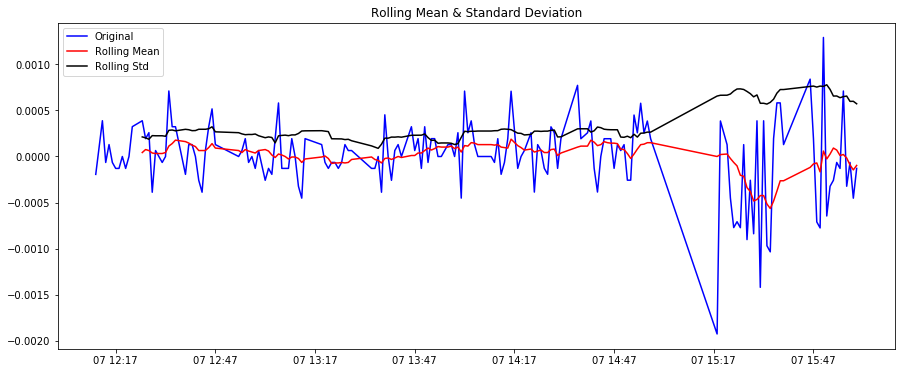

Results of Dickey-Fuller Test:
Test Statistic                -1.267004e+01
p-value                        1.250285e-23
#Lags Used                     0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (5%)           -2.879008e+00
Critical Value (1%)           -3.470126e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


In [46]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

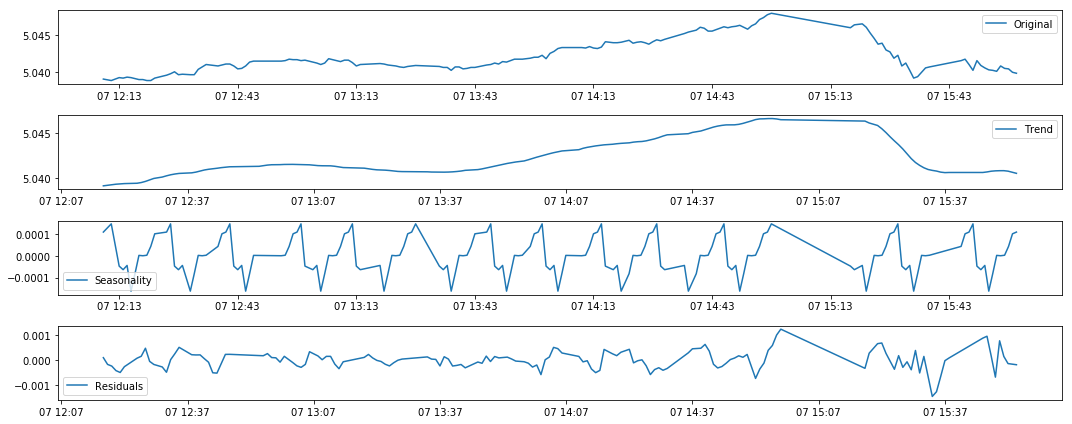

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/osboxes/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


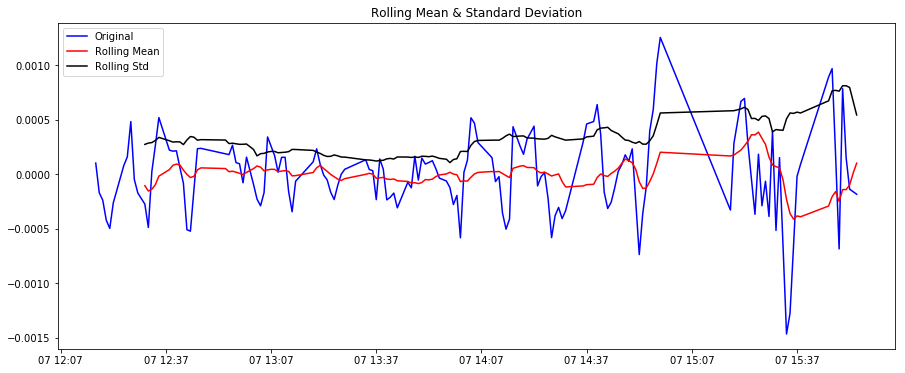

Results of Dickey-Fuller Test:
Test Statistic                -7.178793e+00
p-value                        2.683479e-10
#Lags Used                     4.000000e+00
Number of Observations Used    1.520000e+02
Critical Value (5%)           -2.880750e+00
Critical Value (1%)           -3.474121e+00
Critical Value (10%)          -2.577013e+00
dtype: float64


In [48]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

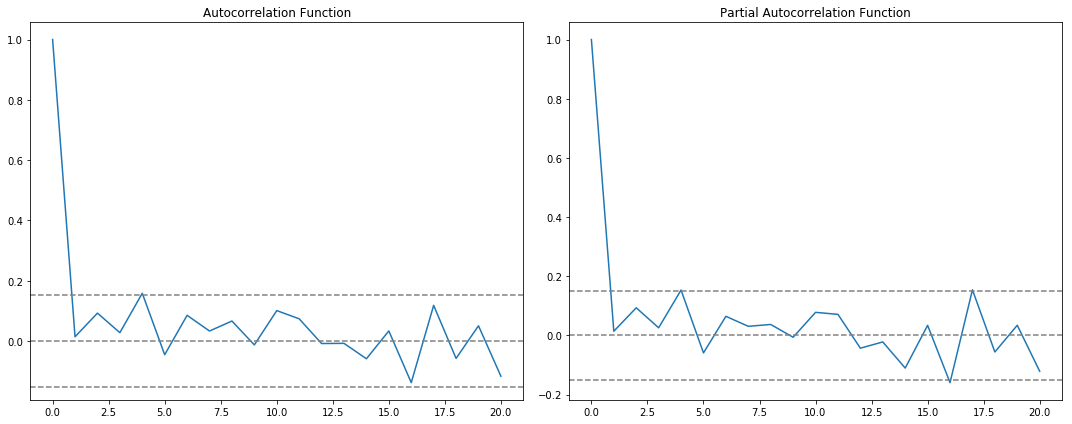

In [49]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

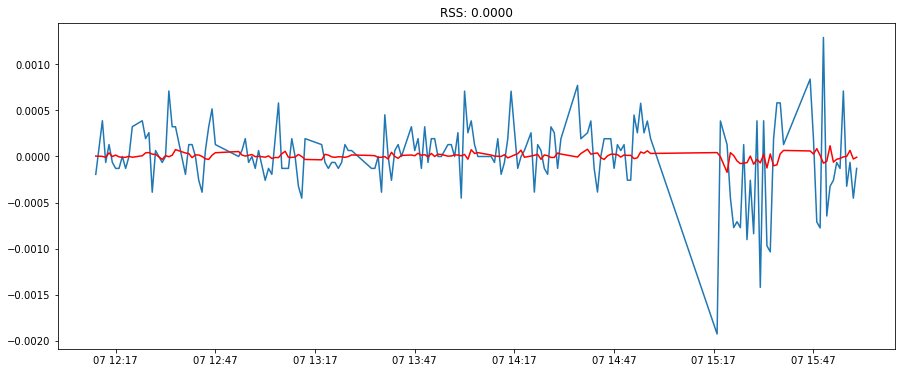

In [50]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

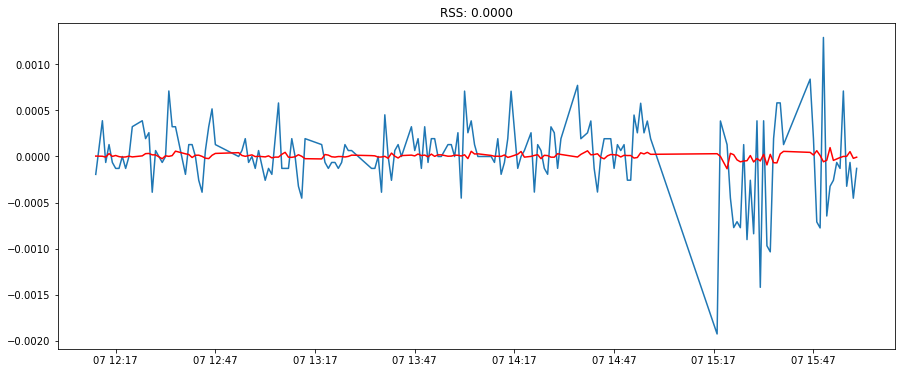

In [51]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/home/osboxes/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


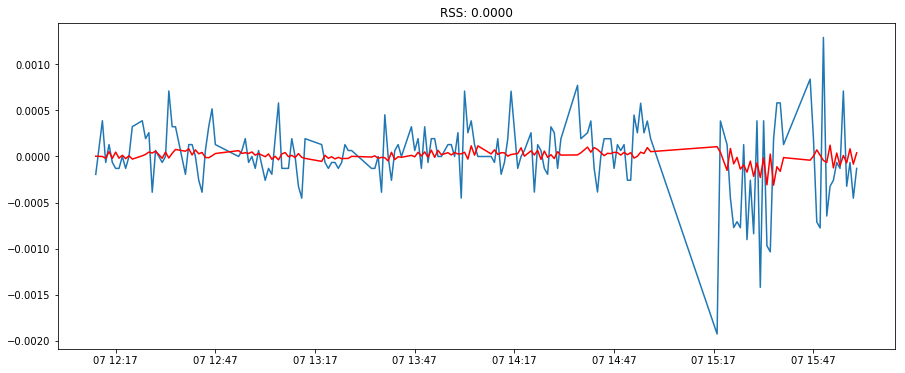

In [52]:
model = ARIMA(ts_log, order=(3,1,2))  
results_ARIMA = model.fit(disp=-1)  

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [53]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

time_stamps
2017-06-07 12:11:00    2.701819e-06
2017-06-07 12:13:00    4.015339e-07
2017-06-07 12:14:00   -1.967518e-05
2017-06-07 12:15:00    5.283319e-05
2017-06-07 12:16:00   -1.949945e-05
dtype: float64


In [54]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

time_stamps
2017-06-07 12:11:00    0.000003
2017-06-07 12:13:00    0.000003
2017-06-07 12:14:00   -0.000017
2017-06-07 12:15:00    0.000036
2017-06-07 12:16:00    0.000017
dtype: float64


In [55]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

time_stamps
2017-06-07 12:09:00    5.039093
2017-06-07 12:11:00    5.039096
2017-06-07 12:13:00    5.039096
2017-06-07 12:14:00    5.039077
2017-06-07 12:15:00    5.039129
dtype: float64

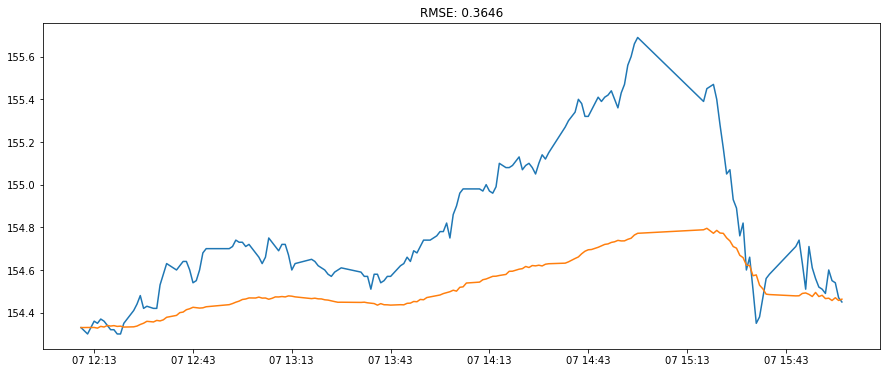

In [56]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))